In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import pairwise_distances

#For plotting
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Get time series data:
data = pd.read_csv('GamesDataAll.csv')

# Make percentile into number and clear "-"
data = data.replace(to_replace='%', value='', regex=True).replace({'-':'NaN'})#.replace(to_replace='Inf', value=+100, regex=True)
#data['Perc_Gain'] = data['Perc_Gain']/100

data.head()

,App_id,Name,Avg_Players,Gain,Perc_Gain,Peak_Players,Last 30 Days,April 2021,March 2021,February 2021,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
0,730,Counter-Strike: Global Offensive,1,0,0,0,695044.47,723346.52,740927.82,741013.24,...,16006.0,15959.89,17372.73,16164.22,14079.39,14134.1,10739.48,16000.75,15475.39,932.57
1,730,Counter-Strike: Global Offensive,0,1,0,0,-28302.0,-17581.31,-85.42,-2196.42,...,46.11,-1412.84,1208.51,2084.83,-54.71,3394.62,-5261.27,525.36,14542.81,NaN
2,730,Counter-Strike: Global Offensive,0,0,1,0,-3.91,-2.37,-0.01,-0.30,...,+0.29,-8.13,+7.48,+14.81,-0.39,+31.61,-32.88,+3.39,+1559.43,NaN
3,730,Counter-Strike: Global Offensive,0,0,0,1,1119102,1148077,1198581,1123485,...,31966,32166,35238,31359,27553,50533,20850,36057,52261,1642
4,570,Dota 2,1,0,0,0,413025.27,413784.97,390412.76,404832.13,...,174835.73,180878.9,166972.97,147748.14,121924.42,101077.43,75965.44,61867.68,55768.61,52721.05


In [3]:
# Get Avg_Players.
avg_players = data.loc[data['Avg_Players']==1]
avg_players = avg_players.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
avg_pure = avg_players.drop(columns=['App_id', 'Name']).astype(float)

avg_players.sample(5)

,App_id,Name,April 2021,March 2021,February 2021,January 2021,December 2020,November 2020,October 2020,September 2020,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
31876,1014280,The Devil's Calculator,1.51,1.18,0.55,0.63,0.72,0.72,0.75,0.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32036,260410,Get Off My Lawn!,1.18,0.95,1.52,1.36,1.25,1.29,1.89,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5372,1041720,Kingdoms of Amalur: Re-Reckoning,145.05,188.16,263.31,363.85,199.93,262.71,597.99,2273.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15600,1015890,TASOMACHI: Behind the Twilight,23.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32984,1175880,War Room,3.64,3.78,5.37,9.01,14.32,35.45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
avg_players['max'] = avg_pure.max(axis=1)
avg_players.sort_values(by=['max'], ascending=False, inplace=True)#.reset_index(drop=True)

In [41]:
ranks = [0,100,500,2000,5000]

print('Using maximum of Avg_Players:')
for i in ranks:
    print('The cutoff for top '+str(i)+' games is '+str(avg_players.reset_index(drop=True)['max'][i]))

Using maximum of Avg_Players:
The cutoff for top 0 games is 1584886.77
The cutoff for top 100 games is 24820.66
The cutoff for top 500 games is 3291.5
The cutoff for top 2000 games is 395.07
The cutoff for top 5000 games is 49.52


(0.999, 49.52]            4128
(49.52, 395.07]           3000
(395.07, 3291.5]          1500
(3291.5, 24820.66]         400
(24820.66, 1584886.77]     100
Name: max, dtype: int64


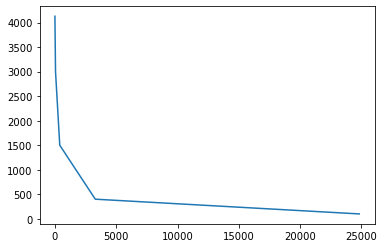

In [43]:
cutoffs = [1] + [avg_players.reset_index(drop=True)['max'][i] for i in ranks[::-1]]

counts  = avg_players['max'].value_counts(bins=cutoffs, sort=False,dropna=False) 

plt.plot(bins[:-1],counts)

print(counts)

In [50]:
grades = [1]*100+[2]*400+[3]*1500+[4]*3000+[5]*4128
avg_graded = avg_players.loc[avg_players['max']>=1].copy()
avg_graded['Grade'] = grades

print('There are '+str(len(grades))+' games stored and assigned with a grade, based on the maximum of Avg_Players.')

There are 9128 games stored and assigned with a grade, based on the maximum of Avg_Players.


In [53]:
avg_graded.reset_index(drop=True).to_csv('GamesDataRanked.csv')